#Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


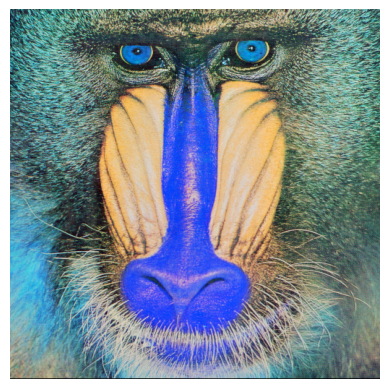

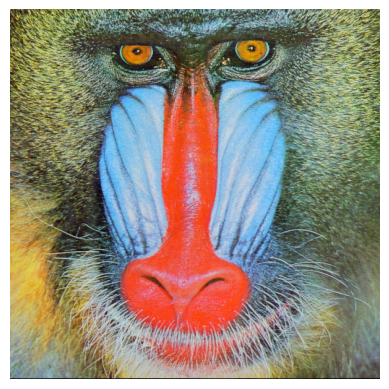

In [2]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Muestra dimensiones
print(img.shape)
#Mostramos la original
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a grises para procesar

(512, 512)


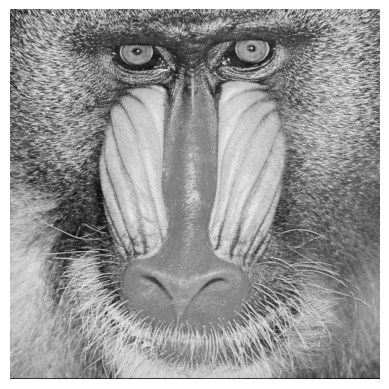

In [3]:
#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de bordes multietapa. Tratado en el tema 4

[[  0 255   0 ...   0 255   0]
 [255 255   0 ...   0   0 255]
 [  0   0 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0 255]
 [  0 255 255 ... 255 255 255]
 [255   0   0 ...   0   0   0]]


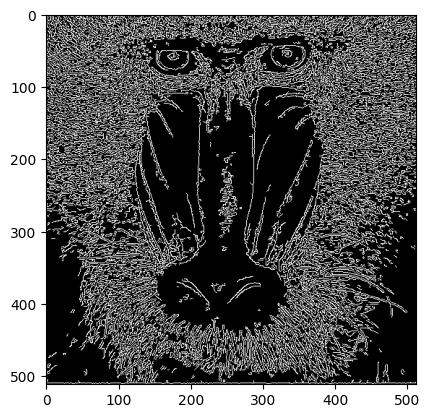

In [4]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
print(canny)
#Muestra resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Definida la imagen de salida de Canny, salida 0 o 255, obtiene el número de píxeles no nulos por columna y visualiza

(0.0, 512.0)

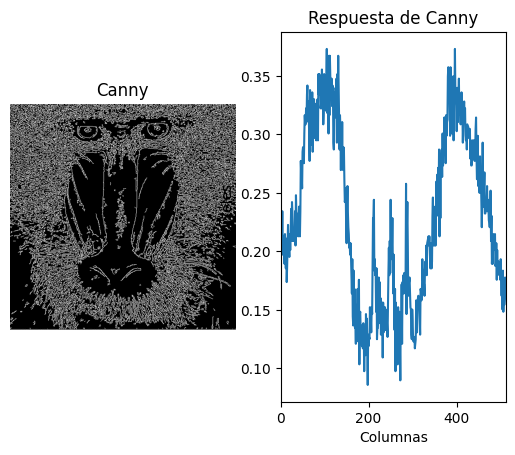

In [31]:
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

Máximo en columnas 191.0 , máximo en filas 222.0
Número de filas >95%: 2 , número de columnas >95% 8


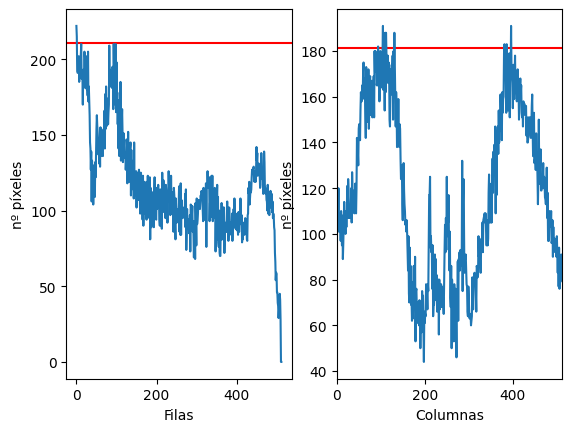

In [32]:
import functools as ft

row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

cols2 = col_counts[0] / 255 
rows = row_counts[:,0] / 255

# Este valor no es significativo
rows[-1] = 0
rows[-2] = 0

col_max = max(cols2)
row_max = max(rows)

print("Máximo en filas", row_max, ", máximo en columnas", col_max)

row_max_num = ft.reduce(lambda x, y: x+1, filter(lambda row: row > row_max*0.95, rows), 0)
col_max_num = ft.reduce(lambda x, y: x+1, filter(lambda col: col > col_max*0.95, cols2), 0)
print("Número de filas >95%:", row_max_num, ", número de columnas >95%", col_max_num)

#Muestra filas y columnas por número
plt.figure()
plt.subplot(1, 2, 1)
plt.xlabel("Filas")
plt.ylabel("nº píxeles")
plt.axhline(y=row_max*0.95, color='r', linestyle='-')
plt.plot(rows) 

plt.subplot(1, 2, 2)
plt.xlabel("Columnas")
plt.ylabel("nº píxeles")
plt.axhline(y=col_max*0.95, color='r', linestyle='-')
plt.plot(cols2)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])
plt.show()

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

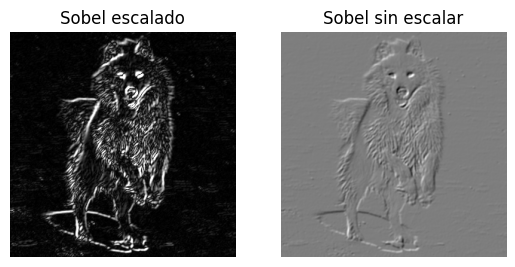

In [56]:
samoyedo = cv2.imread('samoyedo.jpg') 
gris = cv2.cvtColor(samoyedo, cv2.COLOR_BGR2GRAY)

# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title('Sobel escalado')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Sobel sin escalar')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(sobel, cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Máximo en filas 231.91764705882352 , máximo en columnas 215.39607843137256
Número de filas >95%: 5 , número de columnas >95% 6


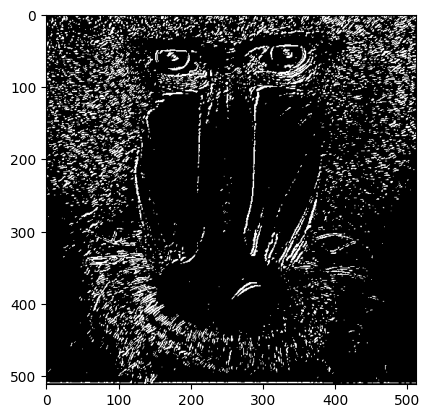

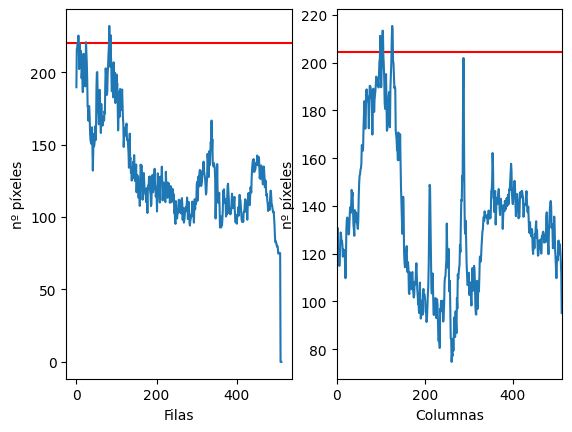

In [55]:
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
sobel8 = np.uint8(cv2.convertScaleAbs(sobel))

#Define valor umbral
valorUmbral = 150 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris

col_counts = cv2.reduce(sobel8, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = cv2.reduce(sobel8, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

cols2 = col_counts[0] / 255
rows = row_counts[:,0] / 255

# Este valor no es significativo
rows[-1] = 0
rows[-2] = 0
rows[-3] = 0

col_max = max(cols2)
row_max = max(rows)

print("Máximo en filas", row_max, ", máximo en columnas", col_max)

row_max_num = ft.reduce(lambda x, y: x+1, filter(lambda row: row > row_max*0.95, rows), 0)
col_max_num = ft.reduce(lambda x, y: x+1, filter(lambda col: col > col_max*0.95, cols2), 0)
print("Número de filas >95%:", row_max_num, ", número de columnas >95%", col_max_num)

#Muestra filas y columnas por número
plt.figure()
plt.subplot(1, 2, 1)
plt.xlabel("Filas")
plt.ylabel("nº píxeles")
plt.axhline(y=row_max*0.95, color='r', linestyle='-')
plt.plot(rows) 

plt.subplot(1, 2, 2)
plt.xlabel("Columnas")
plt.ylabel("nº píxeles")
plt.axhline(y=col_max*0.95, color='r', linestyle='-')
plt.plot(cols2)
#Rango en x definido por las columnas
plt.xlim([0, sobel.shape[1]])
plt.show()


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

In [3]:
vid = cv2.VideoCapture(0)



while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        ggris = cv2.GaussianBlur(framem, (3, 3), 0)

        sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)

        sobel = cv2.add(sobelx, sobely)

        cv2.imshow('Fotograma', cv2.convertScaleAbs(sobelx))
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

In [5]:
import random as rand

vid = cv2.VideoCapture(0)

w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Genera coordenadas al azar sobre el borde de la imagen
def makeCoord(*args):
    num = rand.randint(0, (w+h)*2)

    if num < w:
        return (num, 0)
    if num < w+h:
        return (w, num-w)
    if num < w*2+h:
        return (w*2+h-num, h)
    return (0, w*2+h*2-num)

circle_number = 5
speed = 3

circles = [{
    "info": [(x, y), 8, (rand.randint(0, 255), rand.randint(0, 255), rand.randint(0, 255)), -1], 
    "speed": (speed if x == 0 else -speed, speed if y == 0 else -speed)
} for x, y in map(makeCoord, range(circle_number))]

hola = 0
#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)
            # Muestra resultado
            final_frame = frame.copy()
            diff_vec = cv2.reduce(dif, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
            diff_num = diff_vec.sum()/1_700_000-1

            for circle in circles:
                cv2.circle(final_frame, *circle["info"])
                
                circle["info"][0] = (circle["info"][0][0] + int(circle["speed"][0] * diff_num), \
                                    circle["info"][0][1] + int(circle["speed"][1] * diff_num))

                if circle["info"][0][0] < 0 or circle["info"][0][1] < 0 \
                or circle["info"][0][0] > w or circle["info"][0][1] > h:
                    
                    circle["info"][0] = makeCoord()
                    speedY = 0
                    speedX = 0
                    
                    if circle["info"][0][0] == 0:
                        speedX = speed
                    elif circle["info"][0][0] == w:
                        speedX = -speed
                    else:
                        speedX = speed if rand.randint(0, 1) == 0 else -speed

                    if circle["info"][0][1] == 0:
                        speedY = speed
                    elif circle["info"][0][1] == h:
                        speedY = -speed
                    else:
                        speedY = speed if rand.randint(0, 1) == 0 else -speed

                    circle["speed"] = (speedX, speedY)

            cv2.imshow('Superhot', final_frame) 
        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()